In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Converting pressure to depth on the moon
- They have 15 kbar as 300 km depth

In [2]:
Depth=pt.convert_pressure_to_depth(P_kbar=15, crust_dens_kgm3=3070, g=1.625)
Depth

0    300.676522
dtype: float64

## Their pressures temperatures

In [3]:
Cali_Dataset_Neave=pt.return_cali_dataset(model="Neave2017")
Cali_Dataset_Put=pt.return_cali_dataset(model="Putirka2008")
df_filtered=pd.read_excel('Cpx-Data.xlsx', sheet_name='Cpx_Liq_For_Thermobarometry')

In [4]:
## Calc PT 
exps_out=pt.import_excel('Cpx-Data.xlsx', sheet_name='Experiments')
Cpxs_exp=exps_out['Cpxs']
all_exps=exps_out['my_input']
Liqs_exp=exps_out['Liqs']
exps_PT=pt.calculate_cpx_liq_press_temp(liq_comps=Liqs_exp, cpx_comps=Cpxs_exp,
                                equationT='T_Put2008_eq33', equationP='P_Neave2017', eq_tests=True)

newexps=pd.read_excel('Cpx-Data.xlsx', sheet_name='Experiments')
newexps.head()
newexps['P_kbar_calc']=exps_PT['P_kbar_calc']
new_exps_E=newexps.loc[newexps['Author(year)'].str.contains('Elardo')]
new_exps_D=newexps.loc[~(newexps['Author(year)'].str.contains('Elardo'))]


Using Fe3FeT from input file to calculate Kd Fe-Mg


In [5]:
newexps

,Author(year),Sample_ID_Liq,P(kbar),T(C),DiHderror,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,...,MgO_MELTS_Cpx,CaO_MELTS_Cpx,Na2O_MELTS_Cpx,K2O_MELTS_Cpx,P2O5.1,H2O,CO2,P(kbar).1,T(C).1,P_kbar_calc
0,Elardo_2015_EPSL,1.013,10.5,1330,NaN,45.43,1.52,9.59,0.34,20.58,...,22.588022,6.115688,0.047038,0,0,0,0,10.5,1330,8.145502
1,Elardo_2015_EPSL,1.018,11.5,1320,NaN,44.64,1.57,9.88,0.30,20.48,...,20.009603,8.898292,0.089937,0,0,0,0,11.5,1320,7.928933
2,Elardo_2015_EPSL,1.003,11.5,1300,NaN,44.21,1.59,9.95,0.29,21.02,...,18.424847,9.196951,0.116336,0,0,0,0,11.5,1300,7.709547
3,Elardo_2015_EPSL,1.005,11.5,1280,NaN,43.86,1.64,10.12,0.30,21.06,...,16.043658,11.393784,0.163881,0,0,0,0,11.5,1280,7.929181
4,Elardo_2015_EPSL,1.002,11.5,1250,NaN,44.08,1.83,11.10,0.16,21.36,...,13.148540,12.884499,0.283285,0,0,0,0,11.5,1250,7.987518
5,Elardo_LAP_EPSL,1.023,5.5,1160,NaN,44.25,3.72,11.46,0.16,21.71,...,13.210266,9.386873,0.074291,0,0,0,0,5.5,1160,4.595093
6,Elardo_LAP_EPSL,1.026,7.5,1210,NaN,43.11,2.98,10.75,0.18,21.16,...,14.176358,13.697272,0.129703,0,0,0,0,7.5,1210,5.260919
7,Elardo_LAP_EPSL,1.025,7.5,1190,NaN,43.25,3.00,10.81,0.14,20.87,...,12.696338,13.059276,0.139336,0,0,0,0,7.5,1190,5.916749
8,Elardo_LAP_EPSL,1.027,7.5,1170,NaN,43.10,3.27,11.52,0.09,21.05,...,10.510550,12.538350,0.151448,0,0,0,0,7.5,1170,4.959434
9,Elardo_LAP_EPSL,1.022,11.5,1225,NaN,44.37,3.41,11.25,0.12,21.86,...,10.417939,13.605449,0.242805,0,0,0,0,11.5,1225,8.450781


In [6]:
pub_PT=pd.read_excel('Cpx-Data.xlsx', sheet_name='P_T_Data')

pub_PT

,Sample,P(kbar)N&P2017,SEE,"T(C)P2008,Eqn.33",SEE.1,References,Unnamed: 6,min,max
0,23_1-04,2.603507,1.4,1144.223288,33,Thisstudy,NaN,1.017193,12.941356
1,CE5-27-2,3.586089,1.4,1157.656259,33,Thisstudy,NaN,NaN,NaN
2,CE5-27-3,7.096650,1.4,1192.297517,33,Thisstudy,NaN,NaN,NaN
3,5-28-1-06,8.236397,1.4,1203.626339,33,Thisstudy,NaN,NaN,NaN
4,5-28-1-08,6.722272,1.4,1188.835012,33,Thisstudy,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
71,144-px-2,2.129518,1.4,1166.511745,33,"Heetal.,2022",NaN,NaN,NaN
72,203-px-1,4.364997,1.4,1158.424836,33,"Heetal.,2022",NaN,NaN,NaN
73,255(14)-px-1,2.304254,1.4,1159.882285,33,"Heetal.,2022",NaN,NaN,NaN
74,255(14)-px-1,6.212251,1.4,1185.712208,33,"Heetal.,2022",NaN,NaN,NaN


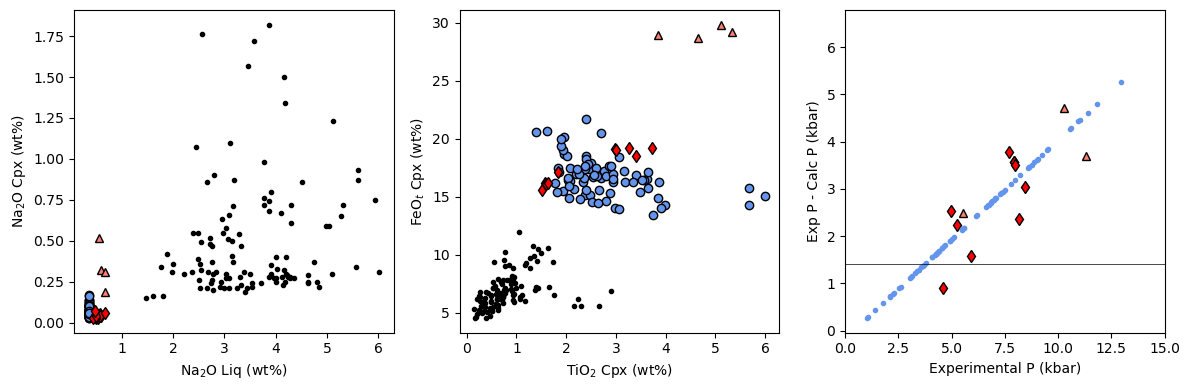

In [7]:
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(Cali_Dataset_Neave['Na2O_Liq'], Cali_Dataset_Neave['Na2O_Cpx'], '.k')
ax1.plot( 0.35+0*df_filtered['Na2O_Cpx'], df_filtered['Na2O_Cpx'], 'ok', mfc='cornflowerblue')
ax1.plot(new_exps_E['Na2O_Liq'], new_exps_E['Na2O_Cpx'], 'dk', mfc='red')
ax1.plot(new_exps_D['Na2O_Liq'], new_exps_D['Na2O_Cpx'],'^k', mfc='salmon')
ax1.set_xlabel('Na$_2$O Liq (wt%)')
ax1.set_ylabel('Na$_2$O Cpx (wt%)')


ax2.plot(Cali_Dataset_Neave['TiO2_Cpx'], Cali_Dataset_Neave['FeOt_Cpx'], '.k', label='NP2017 Cali')
ax2.plot(df_filtered['TiO2_Cpx'], df_filtered['FeOt_Cpx'], 'ok', mfc='cornflowerblue', label='L2023')
ax2.plot(new_exps_E['TiO2_Liq'], new_exps_E['FeOt_Cpx'], 'dk', mfc='red')
ax2.plot(new_exps_D['TiO2_Liq'], new_exps_D['FeOt_Cpx'],'^k', mfc='salmon')
ax2.set_xlabel('TiO$_2$ Cpx (wt%)')
ax2.set_ylabel('FeO$_t$ Cpx (wt%)')

ax3.plot(new_exps_E['P_kbar_calc'], new_exps_E['P(kbar)']-new_exps_E['P_kbar_calc'], 'dk', mfc='red')
ax3.plot(new_exps_D['P_kbar_calc'], new_exps_D['P(kbar)']-new_exps_D['P_kbar_calc'],'^k', mfc='salmon')
ax3.set_xlabel('Exp P (kbar)')
ax3.set_ylabel('Exp P - Calc P (kbar)')
stats=pt.calculate_R2(newexps['P_kbar_calc'], newexps['P(kbar)']-newexps['P_kbar_calc'])
TheirCpx=stats['Grad']*pub_PT['P(kbar)N&P2017']+stats['Int']
ax3.plot(pub_PT['P(kbar)N&P2017'], TheirCpx, '.', color='cornflowerblue', label='Predicted offset for each Cpx')
# ax3.plot(reg['x_pred'], reg['y_pred'], '-r')


# ax3.plot(new_exps_E['P(kbar)'], new_exps_E['P_kbar_calc'], 'dk', mfc='red')
# ax3.plot(new_exps_D['P(kbar)'], new_exps_D['P_kbar_calc'],'^k', mfc='salmon')
# ax3.plot([3, 20], [3, 20], '-k')

# Stats=reg

# ax3.annotate("R$^{2}$="+str(Stats['R2']), xy=(0.05, 0.88),
# xycoords="axes fraction", fontsize=12, color='red')
# ax3.annotate("RMSE="+str(Stats['RMSE']), xy=(0.05, 0.83),
# xycoords="axes fraction", fontsize=12, color='red')
# ax3.annotate("MAE="+str(Stats['Mean']), xy=(0.05, 0.78),
# xycoords="axes fraction", fontsize=12, color='red')
# ax3.annotate("Grad="+str(np.round(Stats['Grad'][0], 2)), xy=(0.05, 0.73),
# xycoords="axes fraction", fontsize=12, color='red')
# ax3.annotate("Int="+str(np.round(Stats['Int'][0], 2)), xy=(0.05, 0.68),
# xycoords="axes fraction", fontsize=12, color='red')
ax3.plot([0, 25], [1.4, 1.4], '-k', lw=0.5)

ax3.set_xlabel('Experimental P (kbar)')
ax3.set_ylabel('Exp P - Calc P (kbar)')

ax3.set_xlim([0, 15])
fig.tight_layout()
fig.savefig('Cpx_vs_cali.png', dpi=200)

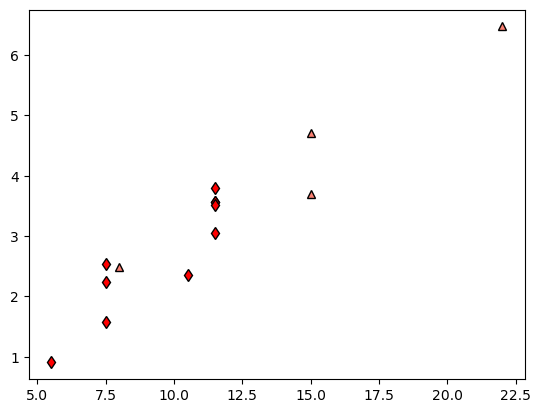

In [8]:
plt.plot(new_exps_E['P(kbar)'], new_exps_E['P(kbar)']-new_exps_E['P_kbar_calc'], 'dk', mfc='red')
plt.plot(new_exps_D['P(kbar)'], new_exps_D['P(kbar)']-new_exps_D['P_kbar_calc'],'^k', mfc='salmon')

Text(0, 0.5, 'Na$_2$O Cpx (wt%)')

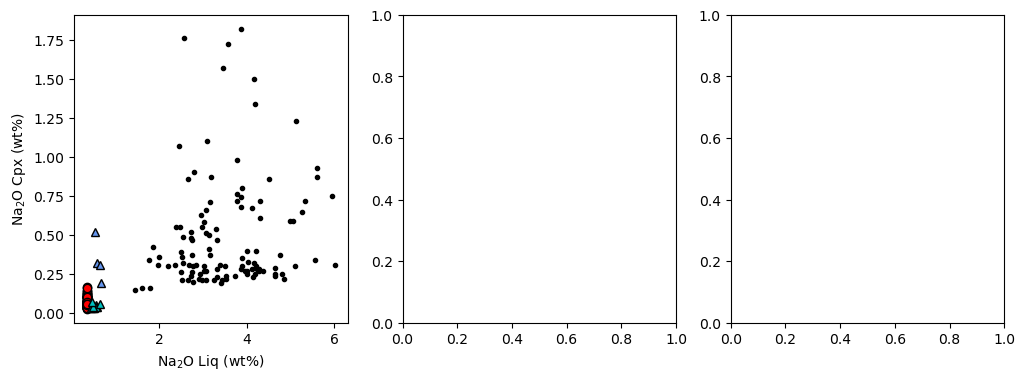

In [9]:
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(Cali_Dataset_Neave['Na2O_Liq'], Cali_Dataset_Neave['Na2O_Cpx'], '.k')
ax1.plot( 0.35+0*df_filtered['Na2O_Cpx'], df_filtered['Na2O_Cpx'], 'ok', mfc='red')
ax1.plot(new_exps_E['Na2O_Liq'], new_exps_E['Na2O_Cpx'], '^k', mfc='c')
ax1.plot(new_exps_D['Na2O_Liq'], new_exps_D['Na2O_Cpx'],'^k', mfc='cornflowerblue')


ax1.set_xlabel('Na$_2$O Liq (wt%)')
ax1.set_ylabel('Na$_2$O Cpx (wt%)')

In [10]:
import ternary
cpx_comps_tern_E=pt.tern_points_px(px_comps=new_exps_E)
cpx_comps_tern_D=pt.tern_points_px(px_comps=new_exps_D)
cpx_comps_tern_PT=pt.tern_points_px(px_comps=df_filtered)

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


<AxesSubplot:>

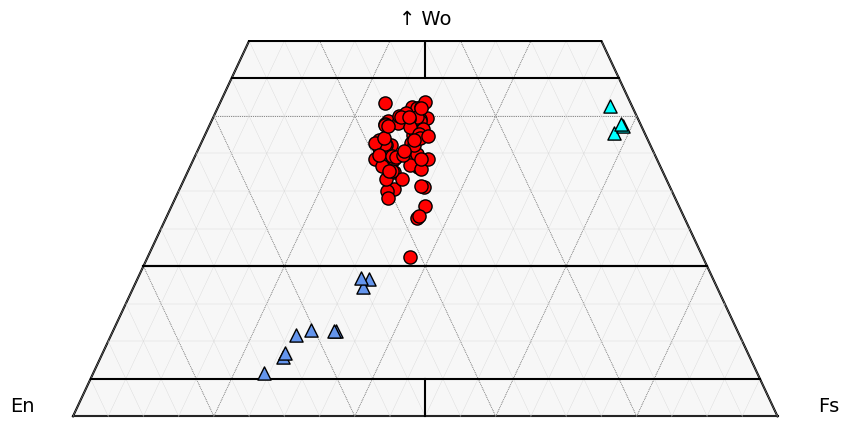

In [11]:
# First, define the plot as above.
fig, tax = pt.plot_px_classification(figsize=(10, 5),  fontsize_component_labels=12,
                                     major_grid=True, minor_grid=True)

## Now feed in your data we calculated at the start in terms of ternary axes!

tax.scatter(
    cpx_comps_tern_E,
    edgecolor="k",
    marker="^",
    facecolor="cornflowerblue",
    label='Label1',
   s=90
)

tax.scatter(
    cpx_comps_tern_D,
    edgecolor="k",
    marker="^",
    facecolor="cyan",
    label='Label1',
   s=90
)

tax.scatter(
    cpx_comps_tern_PT,
    edgecolor="k",
    marker="o",
    facecolor="red",
    label='Label1',
   s=90
)

Text(365.1102941176471, 0.5, 'FeO$_t$ Liq (wt%)')

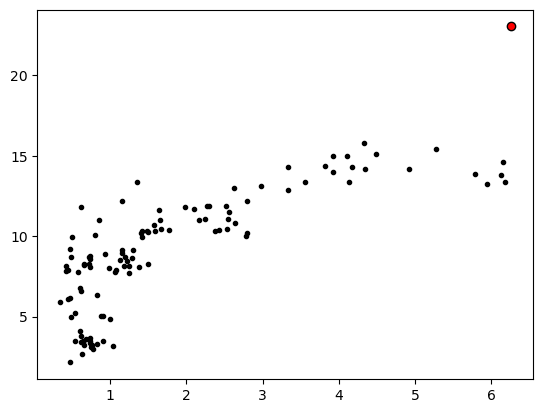

In [12]:
plt.plot(Cali_Dataset_Neave['TiO2_Liq'], Cali_Dataset_Neave['FeOt_Liq'], '.k', label='NP2017')
plt.plot(6.26, 23.05, 'ok', mfc='red', label='Cpx Luo 2023')
ax2.set_xlabel('TiO$_2$ Liq (wt%)')
ax2.set_ylabel('FeO$_t$ Liq (wt%)')

In [13]:
ax1.plot(df_filtered['Na2O_Cpx'], df_filtered['Al2O3_Cpx'], 'ok', mfc='red')

In [14]:
## What about putirka

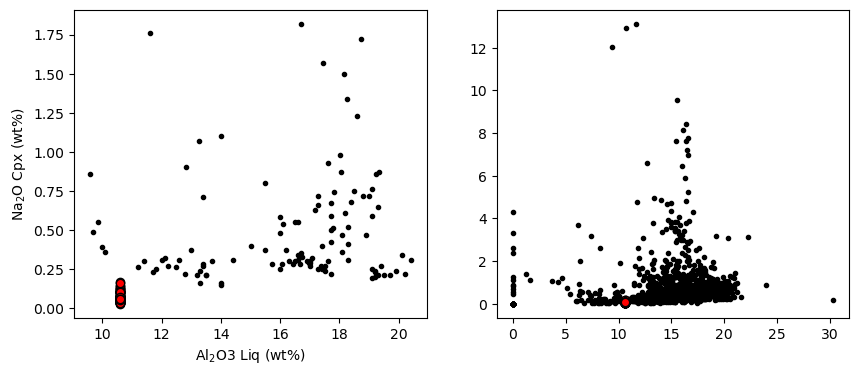

In [15]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Cali_Dataset_Neave['Al2O3_Liq'], Cali_Dataset_Neave['Na2O_Cpx'], '.k')
ax1.plot( 10.59+0*df_filtered['Na2O_Cpx'], df_filtered['Na2O_Cpx'], 'ok', mfc='red')
ax1.set_xlabel('Al$_2$O3 Liq (wt%)')
ax1.set_ylabel('Na$_2$O Cpx (wt%)')
ax2.plot(Cali_Dataset_Put['Al2O3_Liq'], Cali_Dataset_Put['Na2O_Cpx'], '.k')
ax2.plot( 10.59+0*df_filtered['Na2O_Cpx'], df_filtered['Na2O_Cpx'], 'ok', mfc='red')


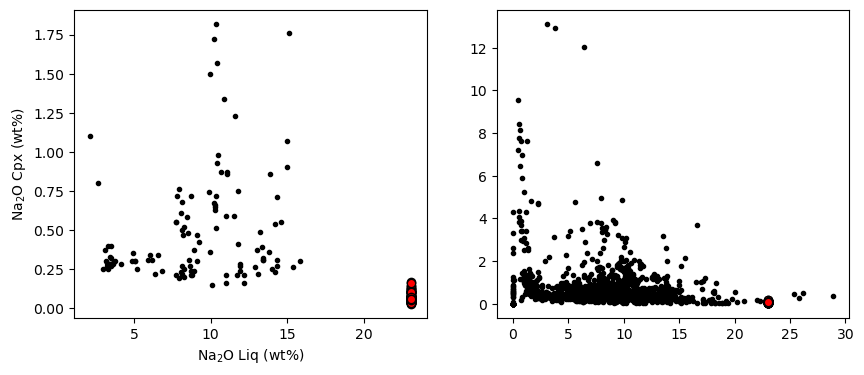

In [16]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(Cali_Dataset_Neave['FeOt_Liq'], Cali_Dataset_Neave['Na2O_Cpx'], '.k')
ax1.plot( 23.05+0*df_filtered['Na2O_Cpx'], df_filtered['Na2O_Cpx'], 'ok', mfc='red')
ax1.set_xlabel('Na$_2$O Liq (wt%)')
ax1.set_ylabel('Na$_2$O Cpx (wt%)')
ax2.plot(Cali_Dataset_Put['FeOt_Liq'], Cali_Dataset_Put['Na2O_Cpx'], '.k')
ax2.plot( 23.05+0*df_filtered['Na2O_Cpx'], df_filtered['Na2O_Cpx'], 'ok', mfc='red')


In [17]:
help(pt.return_cali_dataset)

Help on function return_cali_dataset in module Thermobar.calibration_plots:

return_cali_dataset(model=None)
    This function returns the calibration dataset for different models, often with mineral components returned.
    This allows you to make your own plots rather than using the generic_cali_plot() option.
    
    
    Parameters
    -------
    
    
    model: str
        AMPHIBOLE:
        Ridolfi2021:  Ridolfi et al. (2021)
        Putirka2016:  Putirka (2016)
        Mutch2016: Mutch et al. (2016)
        Zhang2017: Zhang et al. (2017)
    
        CPX:
        Putirka2008: Putirka (2008) - entire database for Cpx-Liq,
        (not used for all equations).
        Masotta2013: Masotta et al. (2013)
        Neave2017:  Neave and Putirka (2017) for Cpx-Liq
        Brugman2019: Brugman and Till 2019
        Petrelli2020:  Petrelli et al. (2020) for Cpx and Cpx-Liq
        Wang2021: Wang et al. (2021) Cpx-only,but contains Liq compositions too.
        Jorgenson2022: Jorgenson 